# We Adapted the ideas of Guillaume Payen's code for preparing the data for  SVM Algorithm from:
https://www.kaggle.com/gpayen/d/snap/amazon-fine-food-reviews/building-a-prediction-model/notebook

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn import cross_validation

mergeDataSet = pd.read_csv("dfFineFood_copy.csv")

Score = mergeDataSet['Score']
Summary = mergeDataSet['Text']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Summary, Score, test_size=0.2, random_state=42)

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [8]:
# Retrieved from 
# https://www.kaggle.com/gpayen/d/snap/amazon-fine-food-reviews/building-a-prediction-model/comments
stemmer = PorterStemmer()
from nltk.corpus import stopwords

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

#--- Training set

corpus = []
for text in X_train:
    text = str(text)
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#--- Test set

test_set = []
for text in X_test:
    text = str(text)
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

from pandas import *
df = DataFrame({'Before': X_train, 'After': corpus})
print(df.head(20))

prediction = dict()

                                                    After  \
251349  we love lavazza gran riserva we have a jura es...   
523262  thi wa bought as a treat for our cat he s a ma...   
224543  perfect varieti of flavor local sea salt to ad...   
291632  order thi on a whim thru subscrib save cooki w...   
37385   thi oatmeal is wonder it is just like the oatm...   
151024  one of my dog is allerg to almost everyth in d...   
347910  i first found thi hot sauc while on vacat in s...   
433324  i like my coffe kind of medium not too strong ...   
361287  i love thi coffe and thi wa a deal for 3 box b...   
408062  krave chocol is the most delect cereal i have ...   
17816   i like all the mari s gone cracker s item but ...   
5267    as i get older and fatter i seek opportun to e...   
437080  late i ve been realli get into espresso and th...   
520689  it ha been someth i had look for so long but a...   
373935  our son love thi cereal thi is a nice transit ...   
358297  not as good as l

In [9]:
# Retrieved from 
# https://www.kaggle.com/gpayen/d/snap/amazon-fine-food-reviews/building-a-prediction-model/comments
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
svm_clf = LinearSVC(C=1, penalty='l1', dual=False)
svm_clf.fit(X_train_tfidf,y_train)
svm_clf.score(X_test_tfidf,y_test)
y_pred = svm_clf.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[10801  5637]
 [ 2561 94692]]


In [10]:
print(metrics.classification_report(y_test, y_pred, target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.81      0.66      0.72     16438
   negative       0.94      0.97      0.96     97253

avg / total       0.92      0.93      0.92    113691



In [11]:
# Retrieved from 
# https://www.kaggle.com/gpayen/d/snap/amazon-fine-food-reviews/building-a-prediction-model/comments
def label(x):
    if x < 0.5:
        return 'Not Useful'
    return 'Useful'


Summary = mergeDataSet['Summary']
UseRatio = mergeDataSet['HelpfulnessFraction']
UseRatio = UseRatio.map(label)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Summary, UseRatio, test_size=0.2, random_state=42)

In [12]:
# Retrieved from 
# https://www.kaggle.com/gpayen/d/snap/amazon-fine-food-reviews/building-a-prediction-model/comments
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
svm_clf = LinearSVC(C=2, penalty='l2', dual=False)
svm_clf.fit(X_train_tfidf,y_train)
svm_clf.score(X_test_tfidf,y_test)
y_pred = svm_clf.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[49665 14693]
 [25504 23829]]


In [13]:
print(metrics.classification_report(y_test, y_pred, target_names = ["Useful", "Not Useful"]))

             precision    recall  f1-score   support

     Useful       0.66      0.77      0.71     64358
 Not Useful       0.62      0.48      0.54     49333

avg / total       0.64      0.65      0.64    113691



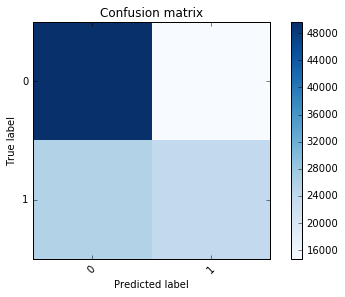

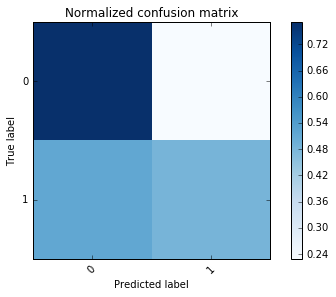

In [14]:
# Retrieved from 
# https://www.kaggle.com/gpayen/d/snap/amazon-fine-food-reviews/building-a-prediction-model/comments
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
#cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()